In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)

plt.style.use('ggplot')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Kuliah/Skripsi/CPO-bappebti.csv', parse_dates=['Tanggal'])
df = df[df['Penyerahan'] == "SPOT"].reset_index(drop = True)
df = df[["Tanggal", "Harga"]]

In [ ]:
df["Year"] = df["Tanggal"].dt.year
df["Weekday"] = df["Tanggal"].dt.day_name()
df["Month"] = df["Tanggal"].dt.month_name()
df["Monthly"] = df["Tanggal"].dt.to_period('M')
df["Quarter"] = df["Tanggal"].dt.quarter
df["Quarterly"] = df["Tanggal"].dt.to_period('Q')

In [ ]:
df[['Year','Weekday','Month','Quarter']] = df[['Year','Weekday','Month','Quarter']].astype('category')

In [ ]:
wd = {'Monday': 'Senin', 'Tuesday': 'Selasa', 'Wednesday': 'Rabu', 'Thursday': 'Kamis', 'Friday': 'Jumat'}
mon = {'January': 'Januari', 'February': 'Februari', 'March': 'Maret', 'April': 'April','May': 'Mei', 'June': 'Juni', 
     'July': 'Juli', 'August': 'Agustus', 'September': 'September','October': 'Oktober', 'November': 'November','December': 'Desember'}
df['Weekday'] = df['Weekday'].map(wd)
df['Month'] = df['Month'].map(mon)

In [ ]:
df['Weekday'] = df['Weekday'].cat.reorder_categories(
    ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'],
    ordered=True
)
df['Month'] = df['Month'].cat.reorder_categories(
    ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
     'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
)

In [ ]:
df.head()

,Tanggal,Harga,Year,Weekday,Month,Monthly,Quarter,Quarterly
0,2010-01-04,7537.0,2010,Senin,Januari,2010-01,1,2010Q1
1,2010-01-05,7725.0,2010,Selasa,Januari,2010-01,1,2010Q1
2,2010-01-06,7724.0,2010,Rabu,Januari,2010-01,1,2010Q1
3,2010-01-07,7683.0,2010,Kamis,Januari,2010-01,1,2010Q1
4,2010-01-08,7566.0,2010,Jumat,Januari,2010-01,1,2010Q1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Tanggal    2467 non-null   datetime64[ns]
 1   Harga      2467 non-null   float64       
 2   Year       2467 non-null   category      
 3   Weekday    2467 non-null   category      
 4   Month      2467 non-null   category      
 5   Monthly    2467 non-null   period[M]     
 6   Quarter    2467 non-null   category      
 7   Quarterly  2467 non-null   period[Q-DEC] 
dtypes: category(4), datetime64[ns](1), float64(1), period[M](1), period[Q-DEC](1)
memory usage: 88.0 KB


In [ ]:
df.sort_values("Harga", ascending = False).iloc[0]

Tanggal      2020-12-29 00:00:00
Harga                    14428.2
Year                        2020
Weekday                   Selasa
Month                   Desember
Monthly                  2020-12
Quarter                        4
Quarterly                 2020Q4
Name: 2466, dtype: object

In [ ]:
df.sort_values("Harga", ascending = True).iloc[0]

Tanggal      2018-11-19 00:00:00
Harga                    5246.68
Year                        2018
Weekday                    Senin
Month                   November
Monthly                  2018-11
Quarter                        4
Quarterly                 2018Q4
Name: 2094, dtype: object

In [ ]:
from datetime import date

def diff_dates(date1, date2):
  return abs(date2-date1).days

def main():
  d1 = date(2018,11,19)
  d2 = date(2020,12,29)
  result1 = diff_dates(d2, d1)
  print("{} days between {} and {}".format(result1, d1, d2))

main()

771 days between 2018-11-19 and 2020-12-29


In [ ]:
pd.pivot_table(
    data = df,
    index = "Month",
    columns = "Weekday",
    values = "Harga",
    margins = True
).round(3)

Weekday,Senin,Selasa,Rabu,Kamis,Jumat,All
Month,,,,,,
Januari,8679.503,8653.140,8622.437,8828.400,8787.857,8712.687
Februari,8612.058,8661.328,8611.244,8594.122,8709.084,8637.437
Maret,8366.994,8414.303,8367.976,8512.090,8477.020,8427.554
April,8230.800,8336.937,8368.963,8192.255,8255.435,8274.579
Mei,8210.225,8310.905,8272.157,8320.587,8241.951,8268.573
Juni,8369.130,8204.826,8298.815,8325.606,8238.452,8285.927
Juli,7950.350,7970.135,7937.253,7918.432,8104.045,7974.968
Agustus,8105.916,8053.234,8094.756,8041.265,7975.721,8054.534
September,8213.370,8228.730,8265.374,8261.262,8154.853,8225.135


In [ ]:
pd.pivot_table(
    data = df,
    index = "Year",
    columns = "Quarter",
    values = "Harga",
    margins = True
).round(3)

Quarter,1,2,3,4,All
Year,,,,,
2010,7371.852,7051.016,7518.774,9290.508,7803.785
2011,9531.242,8967.559,8582.350,8479.453,8888.363
2012,9294.825,9176.661,8703.203,7103.182,8613.770
2013,7763.827,7738.450,8238.450,9701.361,8386.764
2014,9979.273,9567.436,8256.458,7859.426,8876.630
2015,7958.194,8242.033,6968.367,6691.246,7469.016
2016,7482.721,8602.967,8769.345,9299.032,8538.798
2017,9713.097,8588.980,8455.807,8765.179,8908.364
2018,8457.150,8394.220,7393.623,6418.276,7690.463


In [ ]:
pd.pivot_table(
    data = df,
    index = "Month",
    columns = "Year",
    values = "Harga",
    margins = True
).round(3)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
Month,,,,,,,,,,,,
Januari,7339.900,10187.381,8886.667,7664.105,9738.579,7682.952,6723.750,10365.619,8445.168,6504.579,11154.065,8712.687
Februari,7315.895,10105.500,9223.381,7920.600,10002.211,7894.316,7546.950,9795.632,8270.317,6917.634,9576.783,8637.437
Maret,7449.227,8482.739,9774.429,7738.444,10222.647,8276.091,8144.381,9018.955,8667.662,6537.686,8435.158,8427.554
April,7134.381,8677.500,10070.350,7587.714,9664.353,8073.857,8676.250,8375.471,8442.892,6537.849,7413.881,8274.579
Mei,7109.895,9197.550,8867.095,7727.524,9610.118,8197.000,8629.000,8906.647,8470.830,6331.696,6905.703,8268.573
Juni,6920.591,9030.789,8635.095,7927.056,9454.429,8450.952,8508.381,8470.933,8143.656,6197.947,7488.940,8285.927
Juli,7017.364,8596.524,8873.333,7801.522,9146.059,8043.526,8003.375,8113.556,7719.698,5924.320,8862.990,7974.968
Agustus,7831.190,8508.526,8706.368,8263.882,8126.050,6487.300,8817.273,8347.050,7224.147,6623.816,9632.206,8054.534
September,7754.053,8637.600,8512.000,8719.300,7687.591,6453.762,9329.400,8894.526,7176.689,7070.491,10362.575,8225.135


In [ ]:
df[df['Year'] == 2020].sort_values("Harga", ascending = True).iloc[0] # terendah

Tanggal      2020-05-08 00:00:00
Harga                     6421.4
Year                        2020
Weekday                    Jumat
Month                        Mei
Monthly                  2020-05
Quarter                        2
Quarterly                 2020Q2
Name: 2343, dtype: object

In [ ]:
df[df['Year'] == 2020].sort_values("Harga", ascending = False).iloc[0] # tertinggi

Tanggal      2020-12-29 00:00:00
Harga                    14428.2
Year                        2020
Weekday                   Selasa
Month                   Desember
Monthly                  2020-12
Quarter                        4
Quarterly                 2020Q4
Name: 2466, dtype: object

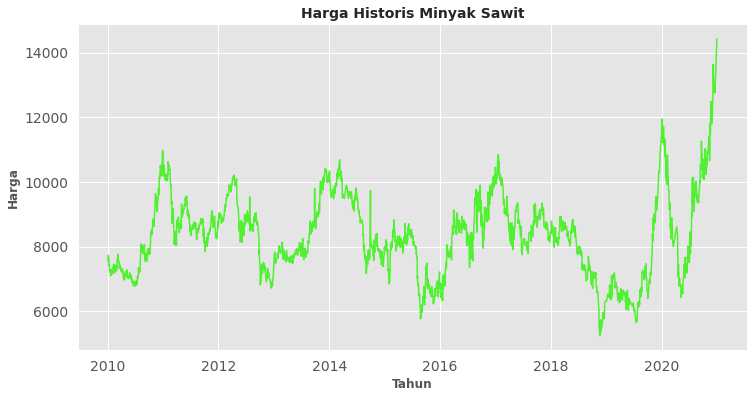

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(df['Tanggal'], df['Harga'], color = '#52f032')

ax.set_title('Harga Historis Minyak Sawit', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Tahun', fontsize = 12, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)

In [ ]:
df.groupby('Year').mean()

,Harga
Year,
2010,7803.784553
2011,8888.363265
2012,8613.769874
2013,8386.763948
2014,8876.630435
2015,7469.016393
2016,8538.797521
2017,8908.363700
2018,7690.463382


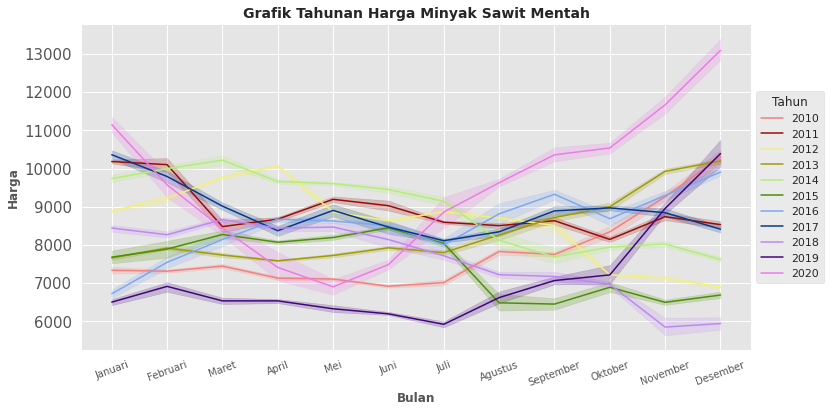

In [ ]:
variable = 'Harga'
fig, ax = plt.subplots(figsize=(12, 6))

palette = ["#f2807c", "#990b06", "#f2f080", "#9e9b03", "#b4ed77", 
           "#4b8f03", "#7da7f0", "#04378f", "#bd88f2", "#410380", 
           "#ed7be7", "#8f0688", "#400121"]
sns.lineplot(df['Month'], df[variable], hue=df['Year'], palette=sns.color_palette(palette, 11))
ax.set_title('Grafik Tahunan Harga Minyak Sawit Mentah', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Bulan', fontsize = 12, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
plt.xticks(rotation=20, fontsize = 10)
#plt.yticks(np.arange(1500, 4500, 500), fontsize = 10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, title="Tahun")

In [ ]:
df['Weekday'].value_counts()

Selasa    504
Senin     504
Rabu      500
Kamis     480
Jumat     479
Name: Weekday, dtype: int64

In [ ]:
df['Quarter'].value_counts()

3    638
4    622
1    618
2    589
Name: Quarter, dtype: int64

In [ ]:
df['Year'].value_counts()

2010    246
2011    245
2015    244
2016    242
2012    239
2013    233
2014    230
2017    227
2018    204
2020    179
2019    178
Name: Year, dtype: int64

In [ ]:
df['Month'].value_counts()

Oktober      220
September    216
Juli         214
November     213
Januari      213
Maret        209
Agustus      208
April        204
Mei          198
Februari     196
Desember     189
Juni         187
Name: Month, dtype: int64

<function matplotlib.pyplot.show>

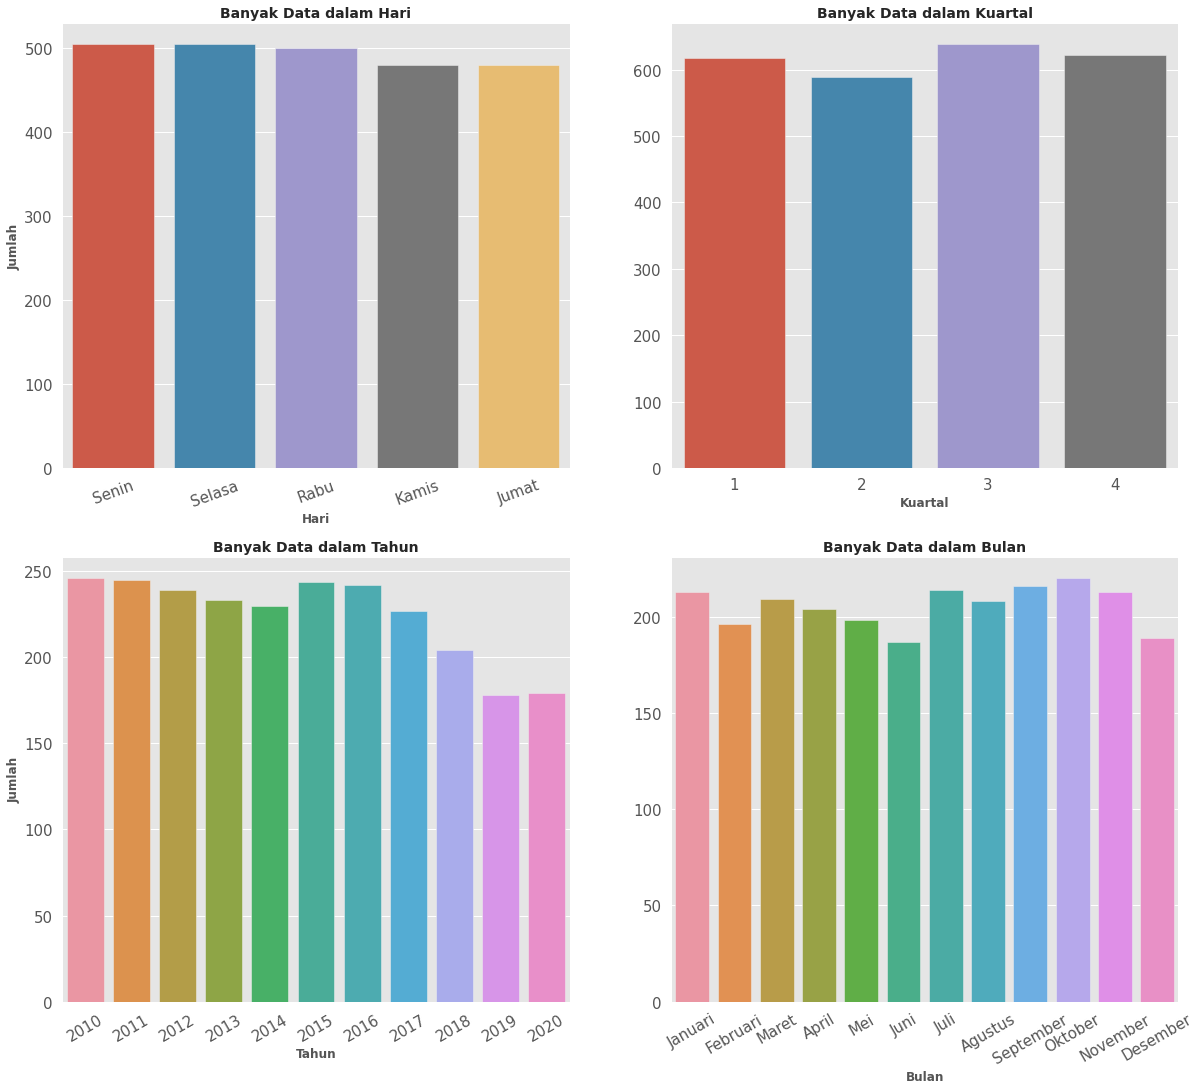

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 18))

sns.countplot(df['Weekday'], ax=ax1)
ax1.set_title('Banyak Data dalam Hari', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax1.set_xlabel('Hari', fontsize = 12, fontdict=dict(weight='bold'))
ax1.set_ylabel('Jumlah', fontsize = 12, fontdict=dict(weight='bold'))
ax1.tick_params(axis='x', rotation=20)

sns.countplot(df['Quarter'], ax=ax2)
ax2.set_title('Banyak Data dalam Kuartal', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax2.set_xlabel('Kuartal', fontsize = 12, fontdict=dict(weight='bold'))
ax2.set_ylabel('')

sns.countplot(df['Year'], ax=ax3)
ax3.set_title('Banyak Data dalam Tahun', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax3.set_xlabel('Tahun', fontsize = 12, fontdict=dict(weight='bold'))
ax3.set_ylabel('Jumlah', fontsize = 12, fontdict=dict(weight='bold'))
ax3.tick_params(axis='x', rotation=30)

sns.countplot(df['Month'], ax=ax4)
ax4.set_title('Banyak Data dalam Bulan', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax4.set_xlabel('Bulan', fontsize = 12, fontdict=dict(weight='bold'))
ax4.set_ylabel('')
ax4.tick_params(axis='x', rotation=30)

plt.show

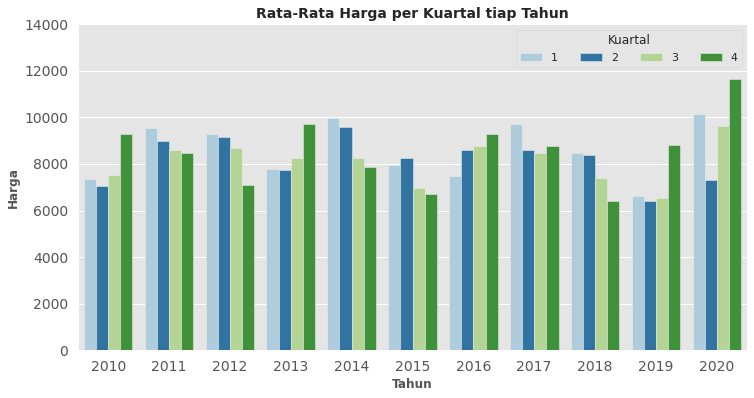

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df, x='Year', y='Harga', hue="Quarter", ci=None, palette=sns.color_palette("Paired"))

ax.set_title('Rata-Rata Harga per Kuartal tiap Tahun', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Tahun', fontsize = 12, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
ax.set(ylim=(0, 14000))
plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
ax.legend(loc='upper right', ncol=4, title="Kuartal")

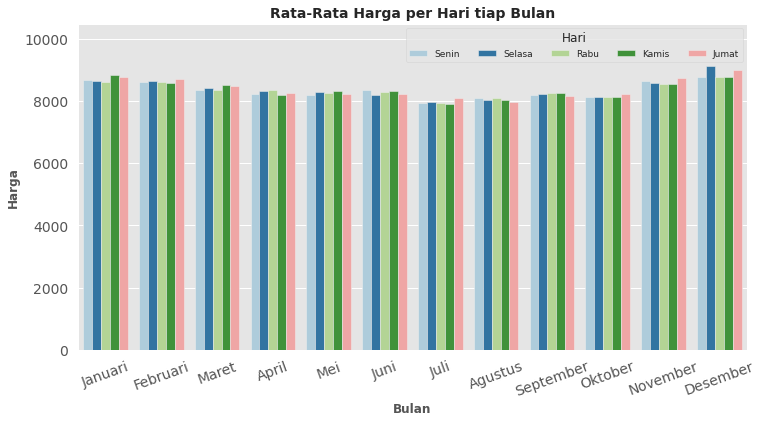

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Harga', hue="Weekday", ci=None, palette=sns.color_palette("Paired"))

ax.set_title('Rata-Rata Harga per Hari tiap Bulan', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Bulan', fontsize = 12, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
ax.set(ylim=(0, 10500))
plt.xticks(rotation=20)
plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
ax.legend(loc='upper right', ncol=5, title="Hari", fontsize=9)

In [ ]:
df[['Harga', 'Year']].groupby('Year').describe()

Harga                            ...                                 
      count         mean          std  ...        50%         75%       max
Year                                   ...                                 
2010  246.0  7803.784553  1003.120250  ...   7402.500   7950.7500  10981.00
2011  245.0  8888.363265   649.598276  ...   8723.000   9100.0000  10630.00
2012  239.0  8613.769874   967.114404  ...   8787.000   9197.0000  10213.00
2013  233.0  8386.763948   895.206627  ...   7911.000   8798.0000  10423.00
2014  230.0  8876.630435   984.092838  ...   9186.500   9682.7500  10692.00
2015  244.0  7469.016393   822.245475  ...   7851.000   8157.7500   8828.00
2016  242.0  8538.797521   884.550858  ...   8606.500   9132.0000  10455.00
2017  227.0  8908.363700   681.364319  ...   8755.000   9166.5000  10853.00
2018  204.0  7690.463382   908.643769  ...   7911.755   8469.0675   8935.75
2019  178.0  7086.519270  1219.765656  ...   6628.320   7187.0400  11629.80
2020  179.0  9847.892682  1757.733888  ...  10023.760  11027.4150  14428.23

[11 rows x 8 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

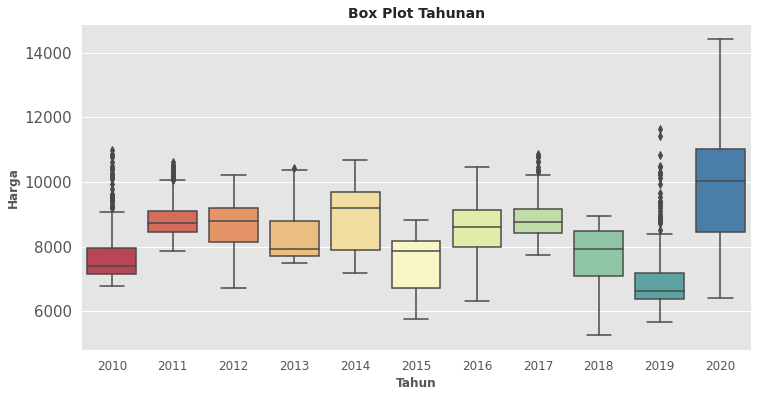

In [ ]:
variable = 'Harga'
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(df['Year'], df[variable], palette='Spectral')
ax.set_title('Box Plot Tahunan', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Tahun', fontsize = 12, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
plt.xticks(fontsize = 12)
#plt.yticks(np.arange(1500, 4500, 500), fontsize = 12)

In [ ]:
df[['Harga', 'Month']].groupby('Month').describe()

Harga                            ...                               
           count         mean          std  ...      50%         75%       max
Month                                       ...                               
Januari    213.0  8712.687042  1510.377687  ...  8579.17  10124.0000  11943.77
Februari   196.0  8637.437194  1150.980870  ...  8400.31   9761.0650  10836.19
Maret      209.0  8427.554354  1009.374467  ...  8391.00   9029.0000  10692.00
April      204.0  8274.578824  1014.558366  ...  8321.43   8738.6175  10213.00
Mei        198.0  8268.572576   957.546935  ...  8472.37   9059.2500   9739.00
Juni       187.0  8285.927487   803.502732  ...  8465.00   8749.0000   9814.00
Juli       214.0  7974.968224   940.759493  ...  8032.50   8608.7500  10145.78
Agustus    208.0  8054.533606   954.192374  ...  8221.50   8653.5000  10023.76
September  216.0  8225.135463  1132.275699  ...  8360.00   8843.5000  11265.15
Oktober    220.0  8152.855364  1056.202909  ...  8077.00   8913.5000  11032.26
November   213.0  8621.249484  1522.788301  ...  8811.00   9450.0000  12495.80
Desember   189.0  8902.321481  1863.156048  ...  8673.02  10194.0000  14428.23

[12 rows x 8 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

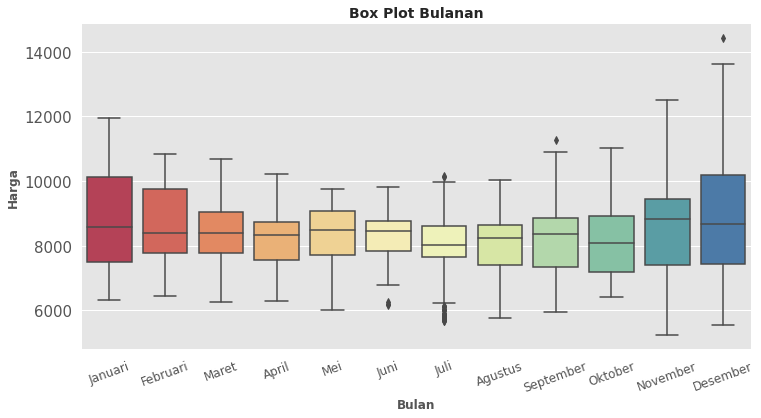

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(df['Month'], df[variable], palette='Spectral')
ax.set_title('Box Plot Bulanan', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Bulan', fontsize = 12, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
plt.xticks(rotation=20, fontsize = 12)
#plt.yticks(np.arange(1500, 4500, 500), fontsize = 12)

In [ ]:
df[['Harga', 'Quarterly']].groupby('Quarterly').describe()

Harga                             ...                                 
          count          mean          std  ...        50%         75%       max
Quarterly                                   ...                                 
2010Q1     61.0   7371.852459   162.185987  ...   7355.000   7454.0000   7764.00
2010Q2     62.0   7051.016129   132.545259  ...   7047.000   7143.7500   7310.00
2010Q3     62.0   7518.774194   414.929163  ...   7665.500   7880.0000   8084.00
2010Q4     61.0   9290.508197   885.045472  ...   9283.000  10102.0000  10981.00
2011Q1     62.0   9531.241935   876.610063  ...  10042.500  10225.5000  10630.00
2011Q2     59.0   8967.559322   303.977555  ...   8945.000   9180.0000   9559.00
2011Q3     60.0   8582.350000   179.126395  ...   8587.000   8723.2500   8862.00
2011Q4     64.0   8479.453125   321.723727  ...   8452.000   8735.5000   9107.00
2012Q1     63.0   9294.825397   409.719201  ...   9222.000   9651.0000   9950.00
2012Q2     62.0   9176.661290   685.400492  ...   8885.500  10014.5000  10213.00
2012Q3     59.0   8703.203390   331.762627  ...   8758.000   8903.0000   9535.00
2012Q4     55.0   7103.181818   207.031675  ...   7107.000   7246.0000   7497.00
2013Q1     52.0   7763.826923   150.334753  ...   7770.000   7868.7500   8140.00
2013Q2     60.0   7738.450000   170.516009  ...   7719.000   7884.0000   8123.00
2013Q3     60.0   8238.450000   458.895779  ...   8215.000   8644.2500   9791.00
2013Q4     61.0   9701.360656   555.215365  ...   9937.000  10106.0000  10423.00
2014Q1     55.0   9979.272727   317.392761  ...   9953.000  10211.5000  10692.00
2014Q2     55.0   9567.436364   183.985382  ...   9600.000   9686.5000   9903.00
2014Q3     59.0   8256.457627   740.420321  ...   8023.000   8853.0000   9734.00
2014Q4     61.0   7859.426230   251.056465  ...   7896.000   8022.0000   8398.00
2015Q1     62.0   7958.193548   465.060082  ...   8015.000   8239.0000   8828.00
2015Q2     61.0   8242.032787   205.817635  ...   8189.000   8396.0000   8713.00
2015Q3     60.0   6968.366667   830.037736  ...   6772.000   7841.7500   8337.00
2015Q4     61.0   6691.245902   279.257805  ...   6664.000   6776.0000   7486.00
2016Q1     61.0   7482.721311   695.511374  ...   7674.000   7900.0000   9137.00
2016Q2     61.0   8602.967213   197.005412  ...   8617.000   8704.0000   9044.00
2016Q3     58.0   8769.344828   715.560375  ...   8880.500   9425.5000   9903.00
2016Q4     62.0   9299.032258   584.315347  ...   9313.000   9756.7500  10455.00
2017Q1     62.0   9713.096774   636.329451  ...   9912.500  10154.2500  10853.00
2017Q2     49.0   8588.979592   400.368554  ...   8614.000   8770.0000   9351.00
2017Q3     57.0   8455.807018   395.458930  ...   8412.000   8723.0000   9334.00
2017Q4     59.0   8765.178983   314.522186  ...   8740.000   9050.0000   9346.00
2018Q1     53.0   8457.150377   235.767696  ...   8502.270   8624.4400   8935.75
2018Q2     50.0   8394.219800   282.317996  ...   8464.055   8600.8725   8835.47
2018Q3     54.0   7393.622593   341.945651  ...   7357.660   7717.1775   8010.35
2018Q4     47.0   6418.275532   623.229594  ...   6582.270   7020.9000   7200.60
2019Q1     43.0   6643.314884   261.614547  ...   6575.500   6813.0400   7182.54
2019Q2     35.0   6420.363429   190.779498  ...   6427.470   6590.4450   6694.21
2019Q3     57.0   6542.943333   556.459270  ...   6586.250   7116.7300   7473.44
2019Q4     43.0   8792.497674  1344.543169  ...   8876.460   9610.1100  11629.80
2020Q1     44.0  10122.008636  1196.945533  ...  10138.495  11187.8275  11943.77
2020Q2     35.0   7317.519429   484.512940  ...   7313.340   7564.4350   8610.36
2020Q3     52.0   9647.597308   839.772841  ...   9723.215  10135.0625  11265.15
2020Q4     48.0  11658.670208  1106.298365  ...  11560.760  12515.3425  14428.23

[44 rows x 8 columns]

In [ ]:
df_1 = df[df['Tanggal'] <= '2014']
df_2 = df[(df['Tanggal'] > '2014') & (df['Tanggal'] <= '2018')]
df_3 = df[df['Tanggal'] > '2018']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

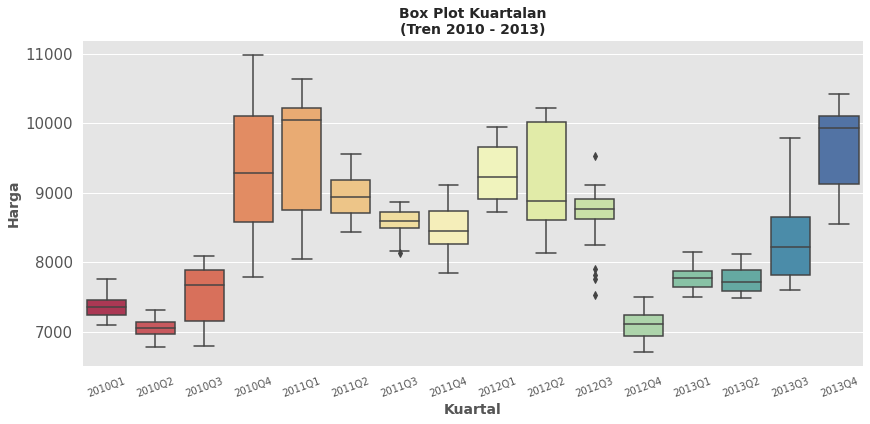

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(df_1['Quarterly'], df_1[variable], palette='Spectral')
ax.set_title('Box Plot Kuartalan\n(Tren 2010 - 2013)', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Kuartal', fontsize = 14, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 14, fontdict=dict(weight='bold'))
plt.xticks(rotation=20, fontsize = 10)
#plt.yticks(np.arange(1500, 4500, 500), fontsize = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

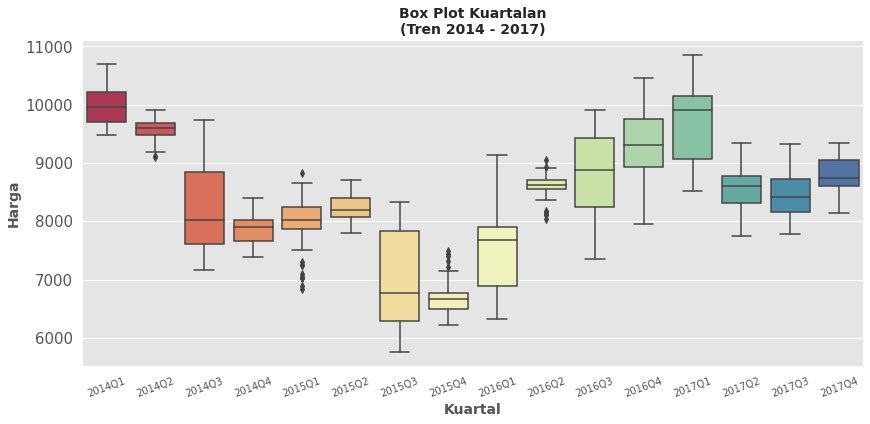

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(df_2['Quarterly'], df_2[variable], palette='Spectral')
ax.set_title('Box Plot Kuartalan\n(Tren 2014 - 2017)', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Kuartal', fontsize = 14, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 14, fontdict=dict(weight='bold'))
plt.xticks(rotation=20, fontsize = 10)
#plt.yticks(np.arange(1500, 4500, 500), fontsize = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

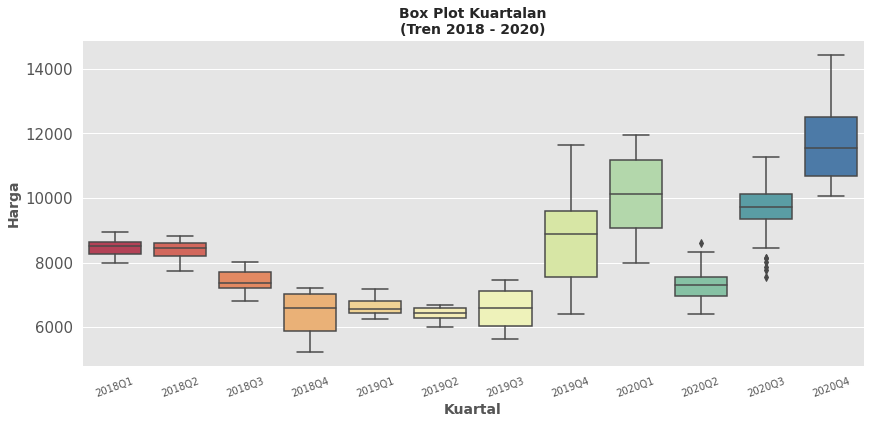

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(df_3['Quarterly'], df_3[variable], palette='Spectral')
ax.set_title('Box Plot Kuartalan\n(Tren 2018 - 2020)', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Kuartal', fontsize = 14, fontdict=dict(weight='bold'))
ax.set_ylabel('Harga', fontsize = 14, fontdict=dict(weight='bold'))
plt.xticks(rotation=20, fontsize = 10)
#plt.yticks(np.arange(1500, 4000, 500), fontsize = 10)